In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
initial_data = yf.download("SOL-USD", start="2021-03-01", end="2022-03-01")


[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,13.108435,15.516057,13.057385,14.955588,14.955588,306451693
2021-03-02,14.966845,15.224125,13.460749,13.958921,13.958921,178549852
2021-03-03,13.963540,14.729359,13.767049,14.115591,14.115591,153830742
2021-03-04,14.094867,14.260361,12.771270,13.097983,13.097983,116364466
2021-03-05,13.066306,13.079862,12.184608,12.610443,12.610443,90978408


In [5]:
import pandas as pd

In [6]:
data =  pd.DataFrame(initial_data['Adj Close'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-03-01 to 2022-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [7]:
data.head()

,Adj Close
Date,
2021-03-01,14.955588
2021-03-02,13.958921
2021-03-03,14.115591
2021-03-04,13.097983
2021-03-05,12.610443


array([<AxesSubplot:xlabel='Date'>], dtype=object)

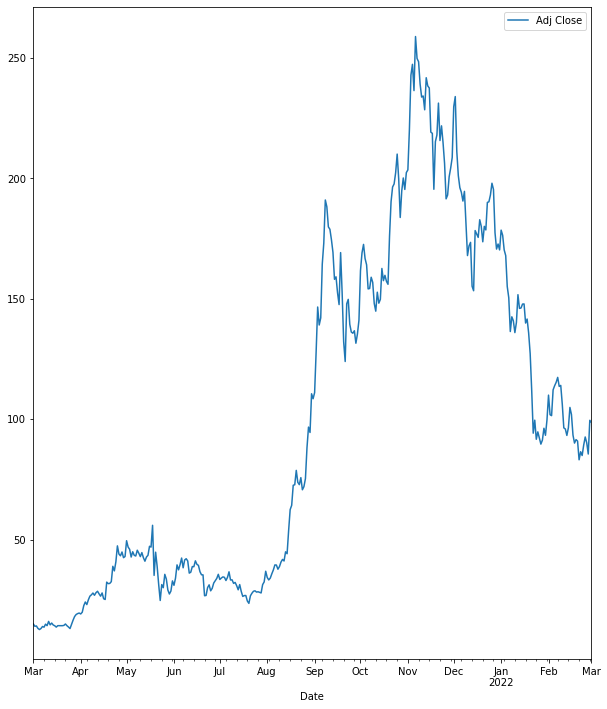

In [8]:
data.plot(figsize=(10, 12), subplots=True)

In [9]:
data.describe().round(2)

,Adj Close
count,366.00
mean,97.74
std,71.08
min,12.61
25%,33.21
50%,87.28
75%,159.08
max,258.93


In [10]:
data.diff().head().dropna()

,Adj Close
Date,
2021-03-02,-0.996667
2021-03-03,0.156670
2021-03-04,-1.017608
2021-03-05,-0.487540


In [11]:
data.pct_change().dropna()

,Adj Close
Date,
2021-03-02,-0.066642
2021-03-03,0.011224
2021-03-04,-0.072091
2021-03-05,-0.037223
2021-03-06,0.033783
...,...
2022-02-25,0.038165
2022-02-26,-0.026537
2022-02-27,-0.051281


In [12]:
data.pct_change().mean()

Adj Close    0.007987
dtype: float64

In [13]:
rets = np.log(data / data.shift(1)).dropna()
rets.head().round(4)
#To Calculate Log Return

,Adj Close
Date,
2021-03-02,-0.0690
2021-03-03,0.0112
2021-03-04,-0.0748
2021-03-05,-0.0379
2021-03-06,0.0332


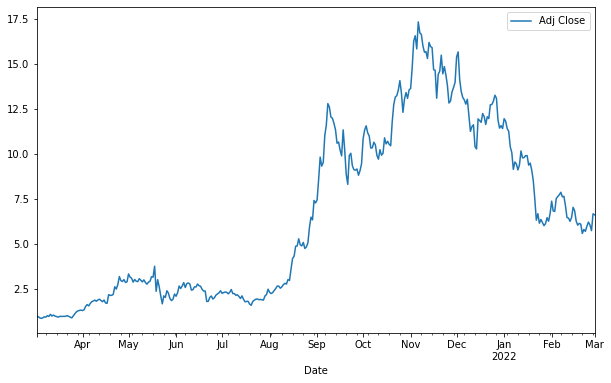

In [14]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));
#Cummulative Log Return

In [15]:
normal_return = []
for i in range(0,len(initial_data)-1):
    adjclose_yesterday = initial_data.iloc[i]['Adj Close']
    adjclose_today = initial_data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.06664177199554829,
 0.011223619063755595,
 -0.07209104353883146,
 -0.037222542710982506,
 0.03378270662772041]

In [16]:
log_return = []
for i in range(0,len(initial_data)-1):
    adjclose_yesterday = initial_data.iloc[i]['Adj Close']
    adjclose_today = initial_data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.0689661989807534,
 0.011161101597876017,
 -0.07482165827044047,
 -0.03793298704797165,
 0.03322460567289264]

In [17]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.91513204 and its annulized volatility is 1.43408928


In [18]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.88652925 and its annulized volatility is 1.43455577


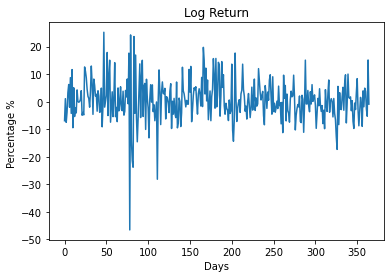

In [19]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

In [20]:
import os

In [21]:
SP = data['Adj Close'][-1]
print('The spot price is', round(SP,2))

The spot price is 98.65


In [22]:
S0 = 98.65             # spot stock price - should be the closing price of 1st March 2022 or using price of day
# Used 1st March 2022 Closing Price as per Yahoo Finance
K = 95              # strike -  set a reasonable strike price
T = 2/52                 # maturity -  1 Week, if we put 1 week should set as 1/52
# 2 Weeks
r = 0.0166              # risk free rate - check online US risk free rate, 1Y/2Y/5Y - should be around 1%, use the yield percent - mention the percentage
# Used 1st April March 12 Month Rate from Bloomberg
sig = 1.4346           # diffusion coefficient or volatility - use log return to calculate and get annualised volatility
N = 7                  # number of periods or number of time steps  - 4 months for each step
payoff = "put"          # payoff 
# INPUT ACCESS DATE

In [23]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor - type as 1.0 so that default answer will show in float

# Make sure all the values you get are float

In [24]:
S = np.zeros((N + 1, N + 1)) #Setting matrix as 4 x 4, already n has been setup as 3
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
    
# Construct the tree for the underlying asset price
# If have 3 steps need 4 columns, 1 for each step and 1 for the initial 

In [25]:
S

# Looks like a tree
# Forward tree because its a call

array([[ 98.65      , 109.71848515, 122.02884929, 135.7204307 ,
        150.94820132, 167.88452088, 186.72108779, 207.67110894],
       [  0.        ,  88.69811215,  98.65      , 109.71848515,
        122.02884929, 135.7204307 , 150.94820132, 167.88452088],
       [  0.        ,   0.        ,  79.75017839,  88.69811215,
         98.65      , 109.71848515, 122.02884929, 135.7204307 ],
       [  0.        ,   0.        ,   0.        ,  71.70491907,
         79.75017839,  88.69811215,  98.65      , 109.71848515],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         64.4712717 ,  71.70491907,  79.75017839,  88.69811215],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  57.96736024,  64.4712717 ,  71.70491907],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  52.11956836,  57.96736024],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.       

In [26]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

# Setting up risk neutral probability

0.4738681854702857

In [27]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

#Finding out the value at each node - since its a put option will only buy in the last 2 scenarios

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  6.30188785],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 23.29508093],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 37.03263976],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 48.13829377]])

In [28]:
# for European Option
for j in range(N-1, -1, -1): # Since we have to work backward
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) # Risk Neutral Probaility
V

# Working back to find the option value at the start

array([[ 9.36390422,  5.0794473 ,  2.08233756,  0.48271465,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , 13.22438533,  7.77971789,  3.52342195,  0.91756223,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , 18.13049601, 11.61456078,  5.87103783,
         1.74413692,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 24.00230998, 16.78956089,
         9.58900832,  3.31532129,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 30.50273735,
        23.27775284, 15.24115717,  6.30188785],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        37.01531167, 30.52006386, 23.29508093],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 42.8717672 , 37.03263976],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 48.13829377]])

In [29]:
print('European ' + payoff, str( V[0,0]))
# Use os at the start to directly print in string format

European put 9.363904217441291


# Black-Scholes

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [31]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [32]:
euro_option_bsm(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')

9.07306829687726

In [33]:
S = np.linspace(48.65,148.65,21)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bsm(S[i], 95, 2/52, 0.0166, 1.4346, 1, 'put')
    
# linespace to create a numpy nd array from 50 to 150 with 11 intervals

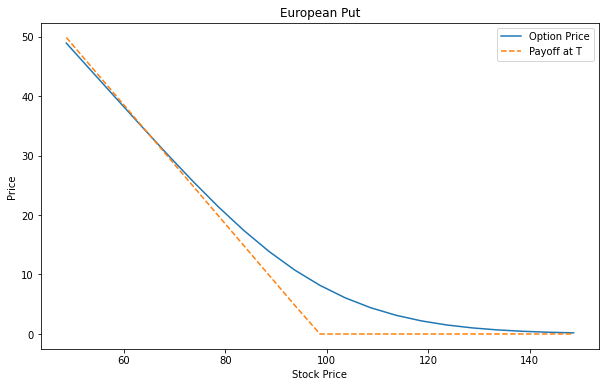

In [34]:
fig = plt.figure(figsize=(10,6))
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(98.5-S,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

## Delta

In [35]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

# Make q '0'if no dividend

In [36]:
S = np.linspace(48.65,148.65,21)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 98.65, 2/52, 0.0166, 0, 1.4346, 'call')
    Delta_Put [i] = delta(S[i], 98.65, 2/52, 0.0166, 0, 1.4346, 'put')

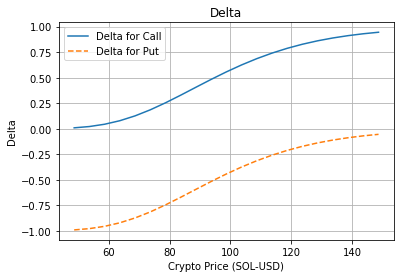

In [37]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Crypto Price (SOL-USD)')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [38]:
S = np.linspace(48.65,148.65,21)
T = np.linspace(1/52, 2/52, 14)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 98.65, T[i], 0.0166, 0, 1.4346, 'put')

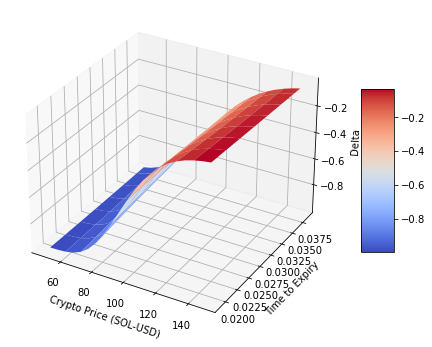

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [40]:
d = delta(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase by USD 1, then the value of the option will decrease by USD', abs(d.round(2)), '.')

The value of Delta is -0.3909 . If the stock price increase by USD 1, then the value of the option will decrease by USD 0.39 .


## Gamma

In [41]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

# Can remove payoff because for call and put its the same

In [42]:
S = np.linspace(48.65,148.65,21)
T = np.linspace(1/52, 2/52, 14)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 95, T[i], 0.0166, 0, 1.4346, 'call')


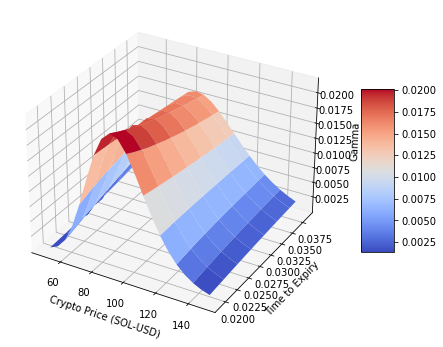

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Most sensitive at peak which is ATM 

In [44]:
g = gamma(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')
print('The value of Gamma is', g.round(4),'.','If the stock price increases by USD 1, then the Delta will increase by ', g.round(4), '.')

The value of Gamma is 0.0138 . If the stock price increases by USD 1, then the Delta will increase by  0.0138 .


## Speed

In [45]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

# Can remove payoff because for call and put its the same

In [46]:
S = np.linspace(48.65,148.65,21)
T = np.linspace(1/52, 2/52, 14)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 95, T[i], 0.0166, 0, 1.43455577, 'put')


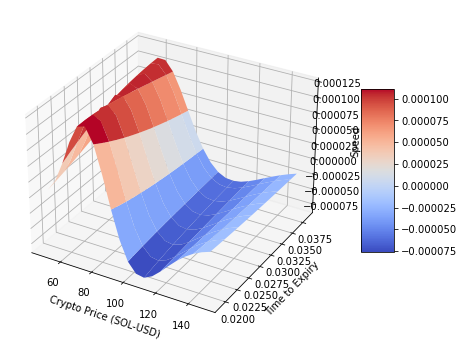

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Positive effect at the start and then negative effect

In [48]:
s = speed(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')
print('The value of Speed is', '{:f}'.format(s),'.','If the stock price increases by USD 1, then the Gamma will reduce by ', '{:f}'.format(-1*s), '.')

The value of Speed is -0.000055 . If the stock price increases by USD 1, then the Gamma will reduce by  0.000055 .


## Theta 

In [49]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [50]:
S = np.linspace(48.65,148.65,21)
T = np.linspace(1/52, 2/52, 14)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 95, T[i], 0.0166, 0, 1.4346, 'put')


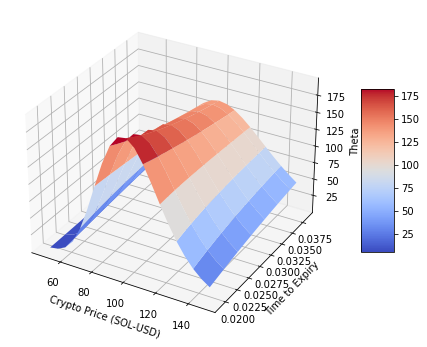

In [51]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
t = theta(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')
print('The value of Theta is', t.round(4),'.','For 1 day that reduces, then the value of the put will increase by USD ', (t/365).round(2), '.')

The value of Theta is 139.3194 . For 1 day that reduces, then the value of the put will increase by USD  0.38 .


## Rho 

In [53]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [54]:
S = np.linspace(48.65,148.65,21)
r = np.linspace(0.0156, 0.0176, 11)
Rho = np.zeros((len(r),len(S)))
for j in range(len(S)):
    for i in range(len(r)):
        Rho[i,j] = rho(S[j], 95, 2/52, r[i], 0, 1.4346, 'put')
# Technically if you change the letter on top to what you want to represent on the graph it should work
# For example if you want to reprsenet volatility you should change the letter from T to vol and define accorrdingly


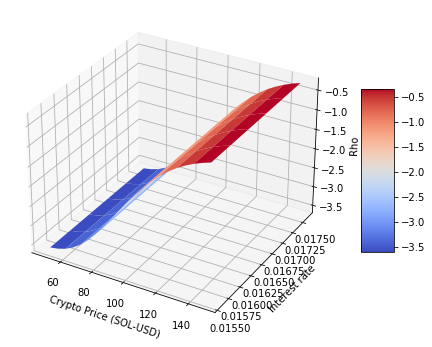

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, r = np.meshgrid(S, r)
surf = ax.plot_surface(S, r, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Interest rate')
ax.set_zlabel('Rho   ')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [56]:
r = rho(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')
print('The value of Rho is', r.round(4),'.','When the risk free rate increases by 0.01%, then the value of the put will decrease by USD ', (r*-0.001).round(4), '.')

The value of Rho is -1.8322 . When the risk free rate increases by 0.01%, then the value of the put will decrease by USD  0.0018 .


## Vega

In [57]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [58]:
vega(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'put')

7.427890763429222

In [59]:
S = np.linspace(48.65,148.65,21)
vol = np.linspace(1.4246, 1.4446, 11)
Vega = np.zeros((len(vol),len(S)))
for j in range(len(S)):
    for i in range(len(vol)):
        Vega[i,j] = vega(S[j], 95, 2/52, 0.0166, 0, vol[i], 'put')


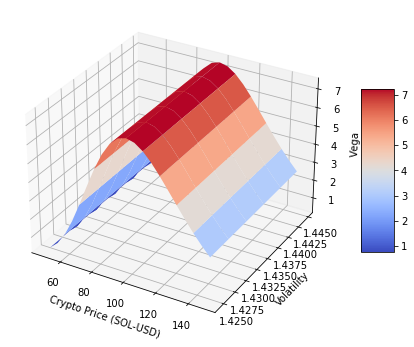

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, vol = np.meshgrid(S, vol)
surf = ax.plot_surface(S, vol, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price (SOL-USD)')
ax.set_ylabel('Volatility')
ax.set_zlabel('Vega  ')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [61]:
v = vega(98.65, 95, 2/52, 0.0166, 0, 1.4346, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase USD', v.round(4)*0.01, '.')

The value of Vega is 7.4279 . If the volatility increases 1%, then the value of the option will increase USD 0.074279 .
